# make plot CuT 1e-9 ENT=1e-6

In [1]:
% housekeeping
% clear data and number format
clear; format short e
% turn off warnings
warning off
graphics_toolkit ("notebook"); 
%graphics_toolkit ("plotly"); 
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt(1:n-12);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB']; addpath(JEQUILIBpath);
Cumodelspath=[rootpath,'/Cu_EN']; addpath(Cumodelspath);

In [2]:
% set constants

pHv=1:0.25:10; CuT=1e-9; ENT=1e-6;

In [3]:
% make model with higher resolutions so plot line is smooth

% MODEL FOR COMPARISON
%model with just inorganic speciation
%geochemical model
% input the constants and solution chemistry

flag1=2; %flag1 for concentration based search vector (1) or for log based search vector (2).
flag2=1; %flag2 for numerical derivatives (2) or analtyical derivatives (1)
database=[]; 
flag3=0; % flag3 1 for show warnings. 0 no warnings
flag4=0; %if=1 solve tableau one line at a time to get a good initial guess (no solids). really challenging probs only
flag5=0; %if=1 use stored initial guess for including solids

inorganicTOTALS=[CuT ENT];
inorganicTOTALS(inorganicTOTALS==0)=1e-16; % get rid of zero values, b/c div by zero error
TOTALS=[inorganicTOTALS]; %TOTALS=inorganicTOTALS;

for i=1:length(pHv);
    pH=pHv(i); pe=20.75-pH; PCO2=10^-3.5;
    [Cuall(i),CuOH,CuOH2s,CuOs,CuCO3s,tenorite,malachite,MASSERR]=CuOHCO2open_EN_allsolids(pH,pe,PCO2,TOTALS',flag1,flag2,flag3,flag4,flag5,database);
end


In [4]:
% experimental data

pH1=[9.01 8.074 7.033 6.052 1.867];
logCuA1=[-13.0405 	 -10.402	 -9.48649	-9.10135 	-9];
logCuB1=[-17.4527 	-14.0608 	-11.5676	-9.45946	-9];
logCumodel1=[-16.8343	-12.8366	-10.6829	-9.21159	-9]

pH2=[10.097 7.972 6.389 4.037 2.331];
logCuA2=[-13.1723	-11.7568	-10.5372	-10.1318	-9];
logCuB2=[-16.4223	-13.8547	-10.9324	-9.55068	-9];
logCumodel2=[-16.454	-13.7356	-9.86988	-9.02568	-9]


logCumodel1,1,2,3,4,5
1,-16.8343,-12.8366,-10.6829,-9.21159,-9


logCumodel2,1,2,3,4,5
1,-16.454,-13.7356,-9.86988,-9.02568,-9


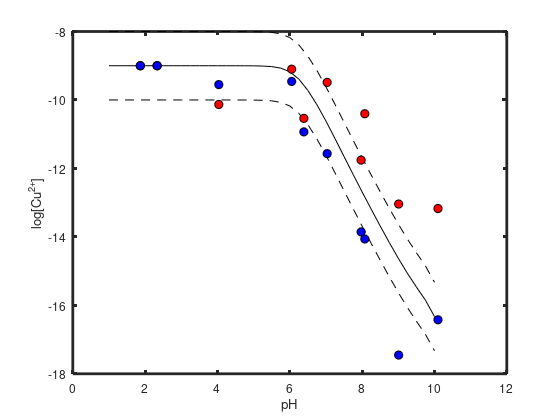

In [5]:
plot(pHv,log10(Cuall),'k-', pHv,log10(Cuall*10),'k--', pHv,log10(Cuall./10),'k--')
hold on
plot(pH1,logCuA1,'ko','markerfacecolor','r')
plot(pH2,logCuA2,'ko','markerfacecolor','r')
plot(pH1,logCuB1,'ko','markerfacecolor','b')
plot(pH2,logCuB2,'ko','markerfacecolor','b')
xlabel('pH'); ylabel('log[Cu^{2+}]')
set(gca,'linewidth',2,'fontsize',12)

In [6]:
pH1
logCuA1
logCuB1

pHv'
log10(Cuall)

pH1,1,2,3,4,5
1,9.01,8.074,7.033,6.052,1.867


logCuA1,1,2,3,4,5
1,-13.0405,-10.402,-9.48649,-9.10135,-9


logCuB1,1,2,3,4,5
1,-17.4527,-14.0608,-11.5676,-9.45946,-9


ans,1
1,1
2,1.25
3,1.5
4,1.75
5,2
6,2.25
7,2.5
8,2.75
9,3
10,3.25


ans,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
1,-9,-9,-9,-9,-9,-9,-9,-9.00001,-9.00001,-9.00002,-9.00004,-9.00008,-9.00015,-9.00031,-9.00064,-9.00146,-9.00357,-9.00934,-9.02548,-9.06939,-9.17691,-9.39104,-9.72119,-10.1394,-10.6168,-11.1288,-11.6528,-12.1739,-12.6867,-13.19,-13.683,-14.1632,-14.6252,-15.0607,-15.4631,-15.8486,-16.3264
